<a href="https://colab.research.google.com/github/ItamarBerger/TabularDS-part1/blob/main/TDS_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/ItamarBerger/TabularDS-part1

fatal: destination path 'TabularDS-part1' already exists and is not an empty directory.


## Load part-1 baseline model

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import joblib

# Load the saved model
model = joblib.load('/content/TabularDS-part1/models/part1_model.pkl')

# Load the same dataset to ensure consistency
dtf = pd.read_csv('/content/TabularDS-part1/data/avocado.csv')

# Error anaylasis and work plan
## intro:
As we recall, our baseline from part-1 already had pretty solid performance (r2 , MSE, residuals, and propotional residuals).
Our goal in this notebook is to present creative approches for improving the baseline model

## Error Analysis Conclusions
1. We observed a sub-optimal RMSE score (around 0.11) in the baseline model.
2. Specifically noticed a model's tendency to underestimate
3. No difference in Avocado type in model's prediction error
4. High importance for the Date feature, which we didn't take into account last part. in this part we'll adress this issue.
5. Many features had skewed distribution or outliers on part-1

## Work-plan
0. Identify weaknesses in the initial model (some of them are listed here below)
1. Feature engeeniring
   - tramnsorming the **Date feature** into something more meaningful to help the model learn the relation we saw on part-1 between the date and the average avocado price

   - Adding **hidden feature** to complete totalVolume as sum of 3 different avocado volumes by sizes and a hidden amount of avocados not from those 3 categories.
2. Handling **outliers** more affectively than in part-1
3. Handling ** skewed features** using IQR

# Basic pre-processing and cleaning

In [7]:
dtf = dtf.dropna()
dtf.drop('Unnamed: 0', axis=1)
print(dtf.isnull().sum())

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Handle categorical columns

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
dtf['type'] = dtf['type'].map({'organic': 1, 'conventional': 0})
le = LabelEncoder()

# Apply label encoding to the 'region' column
dtf['region'] = le.fit_transform(dtf['region'])

## Let's transform the Date feature into its core logical components (year, month, week)

In [9]:
dtf.columns = dtf.columns.str.replace(' ', '')
dtf['Date'] = pd.to_datetime(dtf['Date'])
dtf['month'] = dtf['Date'].dt.month
dtf['year'] = dtf['Date'].dt.year
dtf['week'] = dtf['Date'].dt.isocalendar().week
dtf = dtf.drop('Date', axis=1)

dtf.head()

,Unnamed:0,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,month,week
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,52
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,51
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,50
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,49
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,48


## Handling data skewness

In [11]:
#data processing
import pandas as pd
import numpy as np
import scipy as sp

#statistics
from scipy import stats
import statsmodels.api as sm


#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

import warnings
warnings.filterwarnings("ignore")

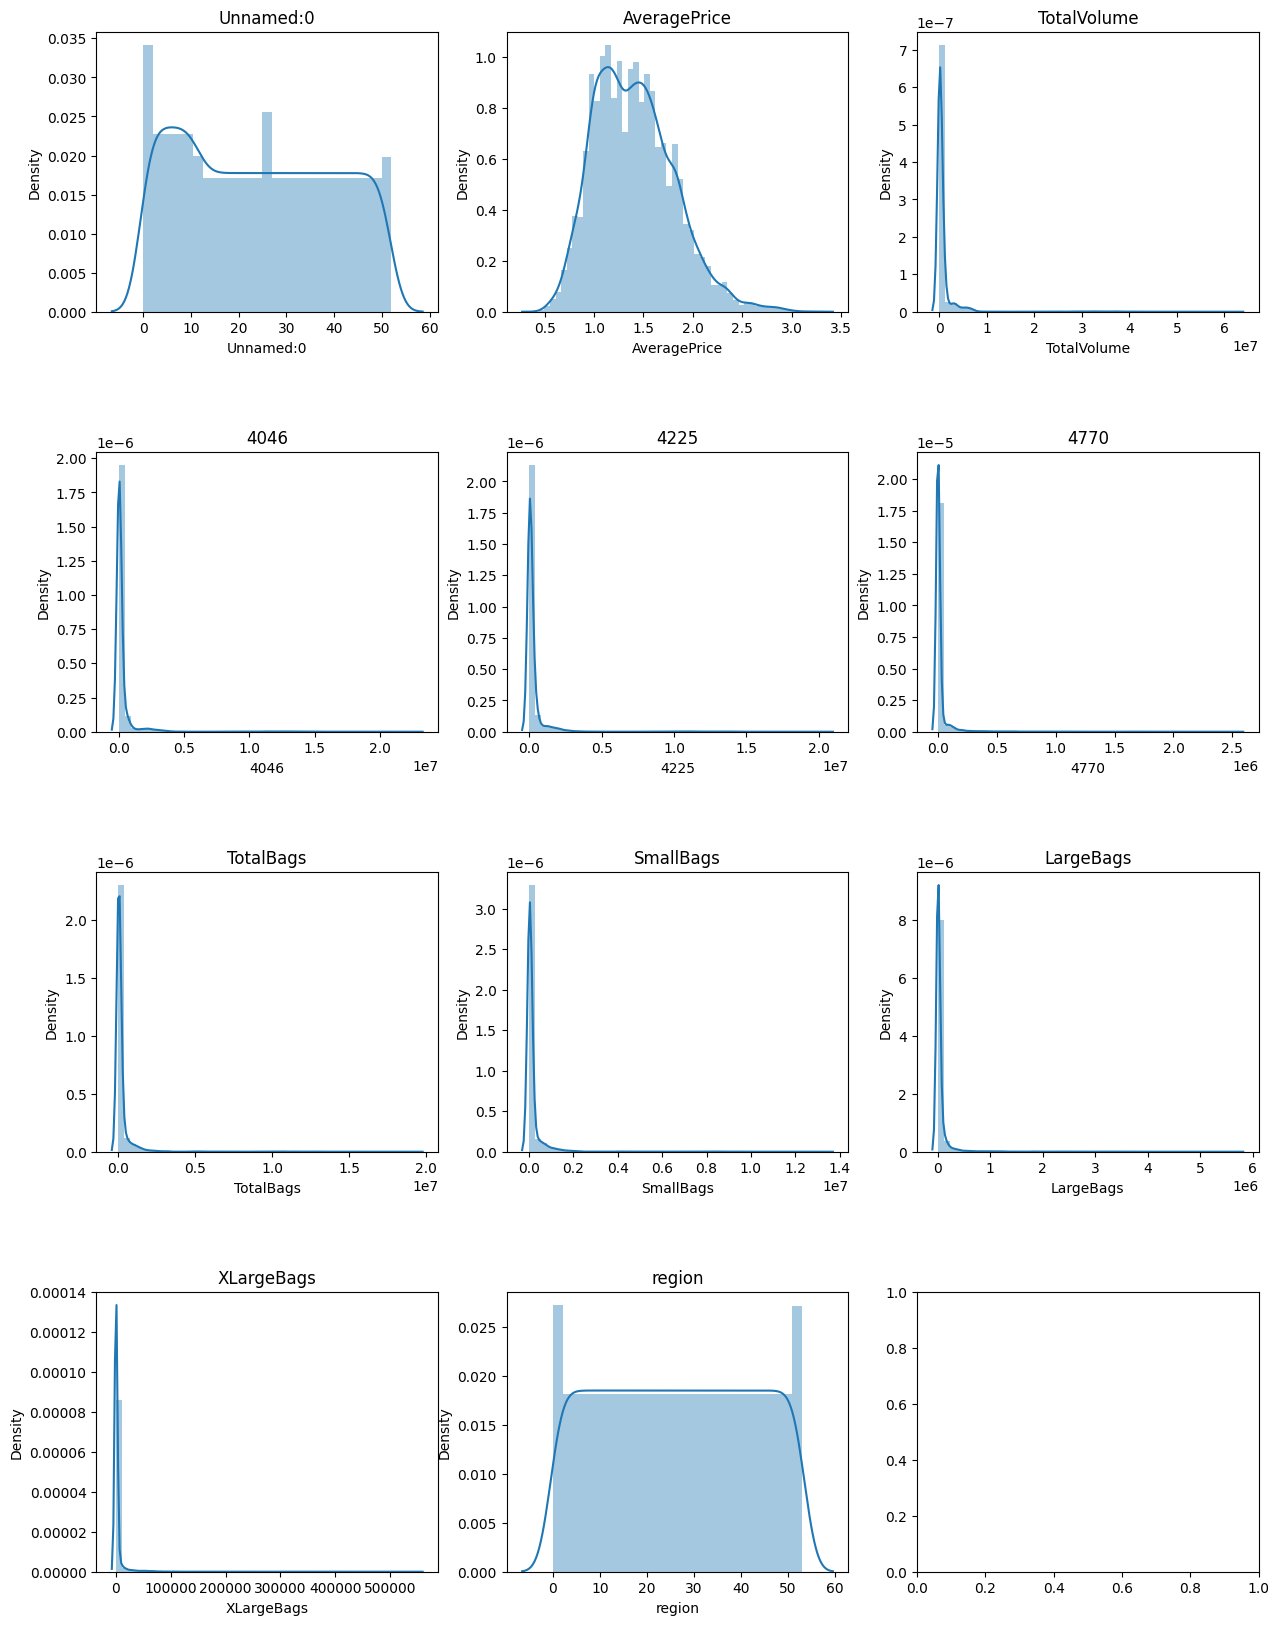

In [12]:

numeric_columns = dtf.dtypes[(dtf.dtypes=="float64") | (dtf.dtypes=="int64")].index.tolist()
very_numerical = [nc for nc in numeric_columns if dtf[nc].nunique()>20]
very_numerical = very_numerical[['TotalVolume','4770', '4224', '4046', 'SmallBags', 'LargeBags', 'TotalBags', 'XLBags' ]]

#we will create a histogram for each numerical column
n=len(very_numerical)
cols = 3
rows=(n//3) + 1 if n%3 !=0 else n//3

#generate a figures grid:
fig, axes = plt.subplots(rows,cols,figsize=(cols*5,rows*5))
fig.subplots_adjust(hspace=0.5)

#Fill the plots:
for i, column in enumerate(very_numerical):
    #calculate the current place on the grid
    r=int(i/cols)
    c=i%cols

    # build the histograms
    #dtf[column].hist(ax=axes[r,c],kde=True)
    sns.distplot(dtf[column],ax=axes[r,c],kde=True)
    axes[r,c].set_title(column)
